In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt


Data preparation: Create Sale file for 2019

In [2]:
path = "C:/Users/vy/Documents/Code/Sale report/"

frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)

df = pd.concat(frames)
df.to_csv('Annual Sale 2019.csv', mode = 'w', index = False)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Analyze: Which month has highest sales 
    combine clean data

In [3]:
df['Month'] = df['Order Date'].str[0:2]
df = df.dropna(how='all')
df = df[df['Month'] != "Or"]
print(set(df['Month']))

{'03', '07', '11', '04', '08', '09', '02', '06', '10', '01', '05', '12'}


Next: Transform data types and create Sales column

In [4]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')
df['Sales'] = df['Quantity Ordered']*df['Price Each']

column_to_move = df.pop("Sales")
df.insert(4, "Sales", column_to_move)
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
5,141239,AAA Batteries (4-pack),1,2.990000,2.990000,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",01
6,141240,27in 4K Gaming Monitor,1,389.989990,389.989990,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",01
7,141241,USB-C Charging Cable,1,11.950000,11.950000,01/05/19 12:04,"181 6th St, San Francisco, CA 94016",01
8,141242,Bose SoundSport Headphones,1,99.989998,99.989998,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",01
9,141243,Apple Airpods Headphones,1,150.000000,150.000000,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016",01


In [5]:
df.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [6]:
sale_value_month = df.groupby('Month').sum()['Sales'] #data truc y
sale_value_month.max()

4613443.5

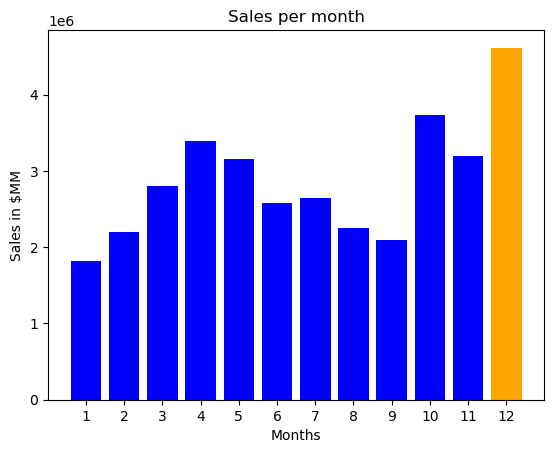

In [7]:
months = range(1,13)

figure, axis = plt.subplots()

colors = ['orange' if (bar == sale_value_month.max()) else 'blue' for bar in sale_value_month]

plt.bar(x=months, height = sale_value_month, color=colors)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in $MM')
plt.title('Sales per month')

plt.show()


Analyze: Which city has highest sales 

In [8]:
find_city = lambda address: address.split(',')[1]
df['City'] = df['Purchase Address'].apply(find_city)
df.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin
5,141239,AAA Batteries (4-pack),1,2.990000,2.990000,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",01,San Francisco
6,141240,27in 4K Gaming Monitor,1,389.989990,389.989990,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",01,Los Angeles
7,141241,USB-C Charging Cable,1,11.950000,11.950000,01/05/19 12:04,"181 6th St, San Francisco, CA 94016",01,San Francisco
8,141242,Bose SoundSport Headphones,1,99.989998,99.989998,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",01,Los Angeles
9,141243,Apple Airpods Headphones,1,150.000000,150.000000,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016",01,San Francisco


In [9]:
df.groupby('City').sum()['Sales']

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

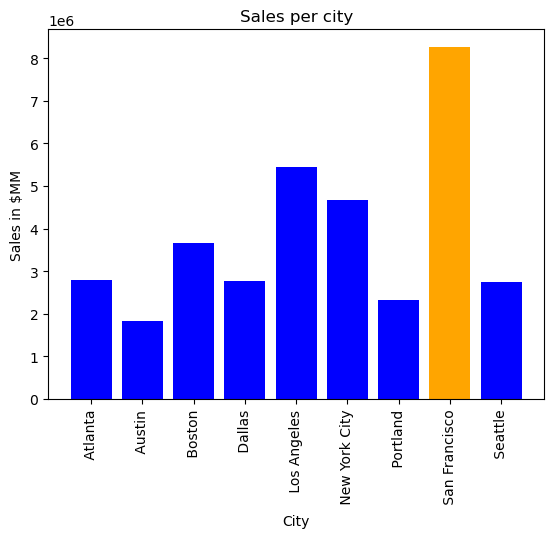

In [10]:
sale_value_city = df.groupby('City').sum()['Sales'] #data truc y
cities = []
for a, b in sale_value_city.items():
    cities.append(a)

figure, axis = plt.subplots()

colors = ['orange' if (bar == sale_value_city.max()) else 'blue' for bar in sale_value_city]

plt.bar(x=cities, height = sale_value_city, color=colors)
plt.xticks(cities, rotation = 90)
plt.xlabel('City')
plt.ylabel('Sales in $MM')
plt.title('Sales per city')

plt.show()

Analyze: Which time should we display ads to maximize the likehood of customer's buying product

In [11]:
#Chuyen doi ve datetime cho order date
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11
5,141239,AAA Batteries (4-pack),1,2.990000,2.990000,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",01,San Francisco,20
6,141240,27in 4K Gaming Monitor,1,389.989990,389.989990,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",01,Los Angeles,12
7,141241,USB-C Charging Cable,1,11.950000,11.950000,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",01,San Francisco,12
8,141242,Bose SoundSport Headphones,1,99.989998,99.989998,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",01,Los Angeles,10
9,141243,Apple Airpods Headphones,1,150.000000,150.000000,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",01,San Francisco,21


In [12]:
sale_value_hour = df.groupby('Hours').sum()['Sales'] #data truc y
highest = sale_value_hour.nlargest(3)

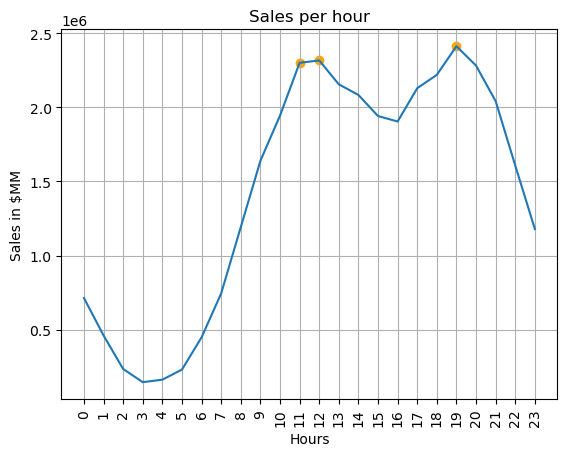

In [13]:
hours = []
markers_on = []
highest_hours = []
for a, b in sale_value_hour.items():
    hours.append(a)
for a, b in highest.items():
    highest_hours.append(a)
    markers_on.append(b)

plt.plot(hours, sale_value_hour)
plt.xticks(hours, rotation = 90)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Sales in $MM')
plt.title('Sales per hour')

plt.scatter(highest_hours, markers_on, color = 'orange')

plt.show()

Analyze: Which products often sold together?

In [17]:
df_dup = df[df['Order ID'].duplicated(keep = False)]
df_dup.groupby('Order ID')['Product'].apply(','.join)

Order ID
141275              USB-C Charging Cable,Wired Headphones
141290     Apple Airpods Headphones,AA Batteries (4-pack)
141365                   Vareebadd Phone,Wired Headphones
141384                  Google Phone,USB-C Charging Cable
141450            Google Phone,Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop,Wired Headphones
319556                      Google Phone,Wired Headphones
319584                            iPhone,Wired Headphones
319596                    iPhone,Lightning Charging Cable
319631    34in Ultrawide Monitor,Lightning Charging Cable
Name: Product, Length: 7136, dtype: object

In [21]:
groupProduct = lambda product: ', '.join(product)
df_dup['All products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All products']].drop_duplicates()
df_dup

C:\Users\vy\AppData\Local\Temp\ipykernel_7020\1645539128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,All products
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [24]:
df_dup['All products'].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All products, dtype: int64

Analyze: What product sold the most? Why?

In [39]:
product_order = df.groupby('Product').sum()['Quantity Ordered'] #data truc y
product_order.nlargest(5)

Product
AAA Batteries (4-pack)      31017.0
AA Batteries (4-pack)       27635.0
USB-C Charging Cable        23975.0
Lightning Charging Cable    23217.0
Wired Headphones            20557.0
Name: Quantity Ordered, dtype: float64

In [45]:
price = df.groupby('Product').mean()['Price Each']
price

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

C:\Users\vy\AppData\Local\Temp\ipykernel_7020\2652243363.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 90, size=8)


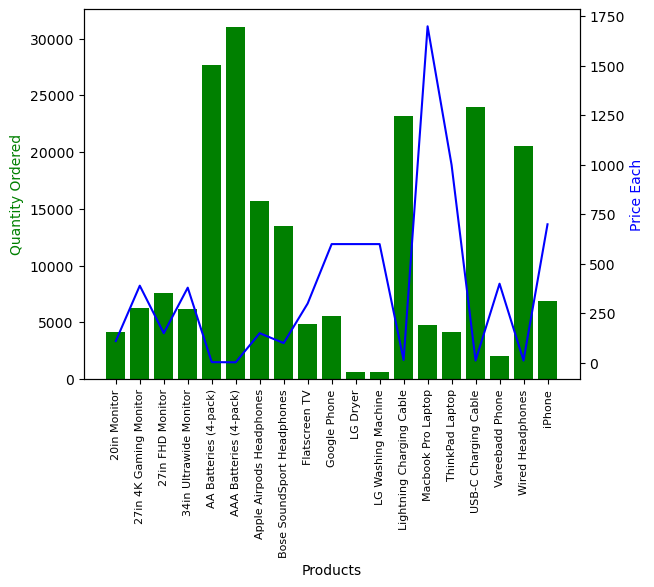

In [48]:
products = [] 
for a, b in product_order.items():
    products.append(a)

x = products
y1 = product_order
y2 = price

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products, rotation = 90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()